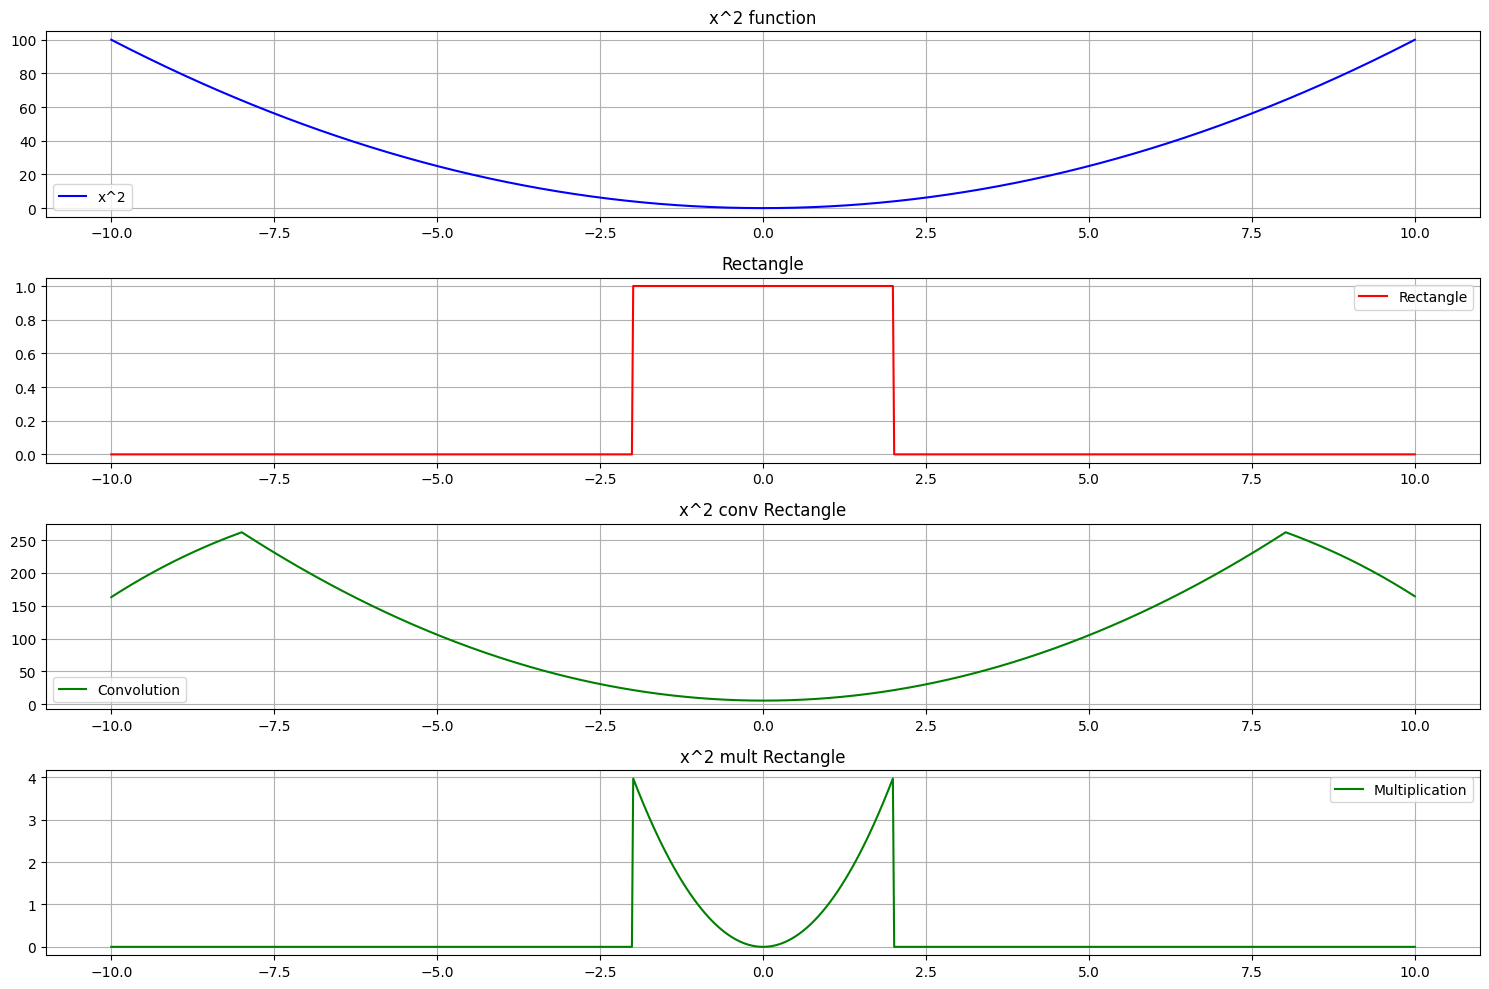

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create time axis
t = np.linspace(-10, 10, 1000)

# Define square function
def square_func(x):
    return x**2

# Define rectangular function
def rect(x, width=2):
    return np.where(np.abs(x) <= width/2, 1, 0)

# Create the functions
square_signal = square_func(t)
rect_signal = rect(t, width=4)

# Calculate convolution
conv_result = np.convolve(square_signal, rect_signal, mode='same') * (t[1] - t[0])
mul_result = square_signal * rect_signal

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, square_signal, 'b-', label='x^2')
plt.title('x^2 function')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, rect_signal, 'r-', label='Rectangle')
plt.title('Rectangle')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(t, conv_result, 'g-', label='Convolution')
plt.title('x^2 conv Rectangle')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, mul_result, 'g-', label='Multiplication')
plt.title('x^2 mult Rectangle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

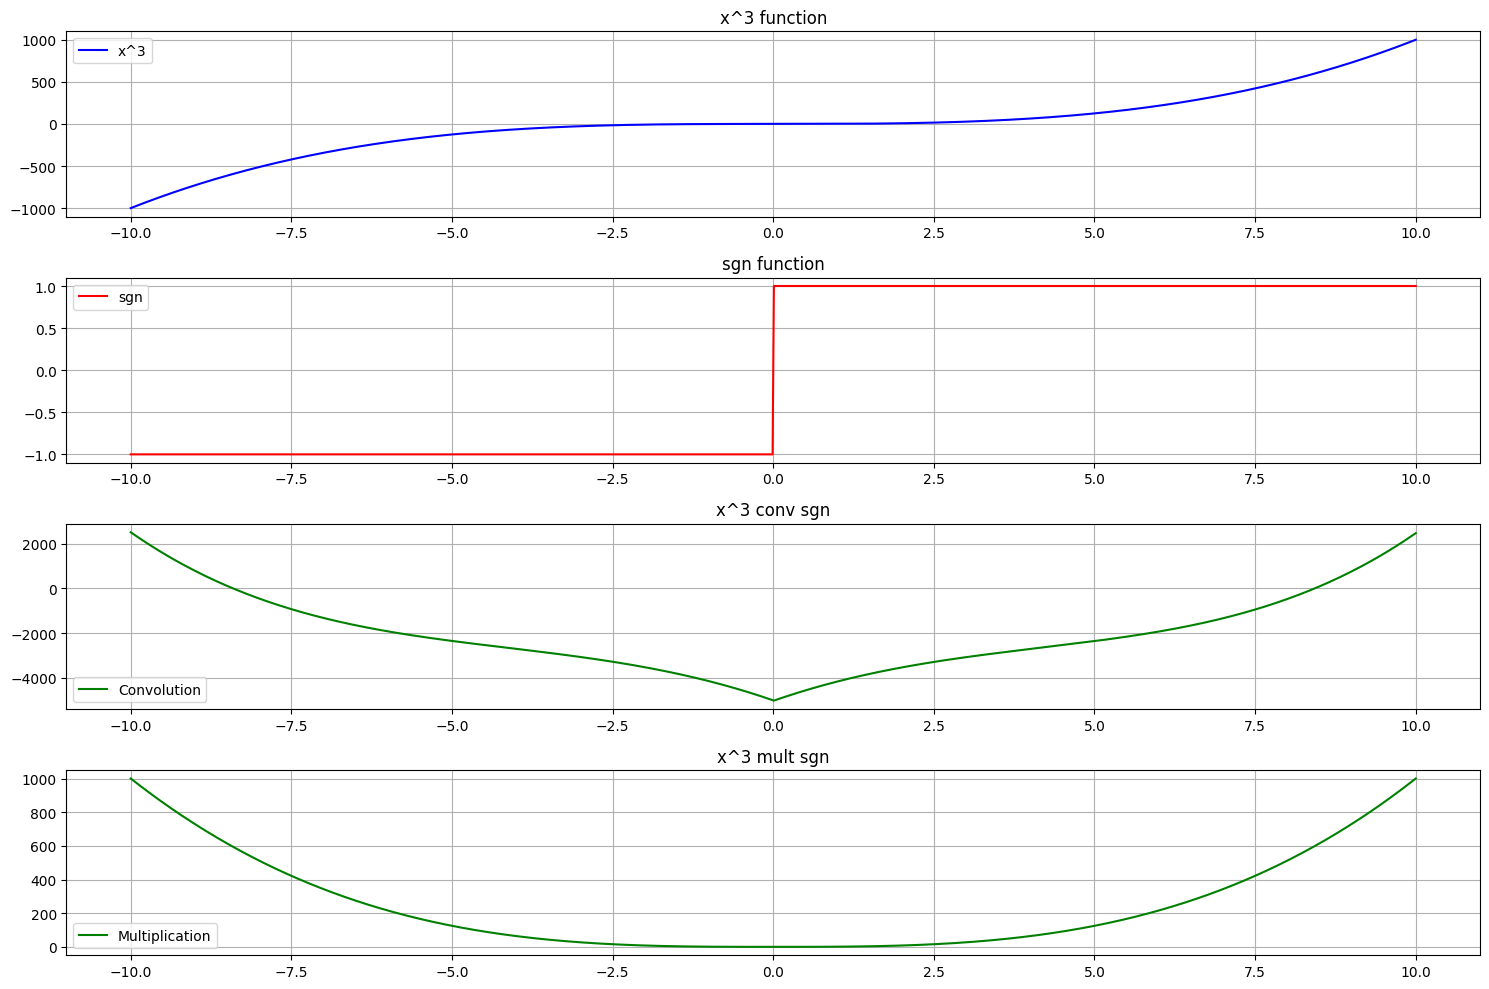

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create time axis
t = np.linspace(-10, 10, 1000)

# Define quadratic function
def quadratic_func(x):
    return x**3

# Define sign function
def sgn(x):
    return np.where(x >= 0, 1, -1)

# Create the functions
quadratic_signal = quadratic_func(t)
sgn_signal = sgn(t)

# Calculate convolution
conv_result = np.convolve(quadratic_signal, sgn_signal, mode='same') * (t[1] - t[0])
mul_result = quadratic_signal * sgn_signal


def rect(x, width=2):
    return np.where(np.abs(x) <= width/2, 1, 0)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, quadratic_signal, 'b-', label='x^3')
plt.title('x^3 function')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, sgn_signal, 'r-', label='sgn')
plt.title('sgn function')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(t, conv_result, 'g-', label='Convolution')
plt.title('x^3 conv sgn')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, mul_result, 'g-', label='Multiplication')
plt.title('x^3 mult sgn')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Periodic Noise Suppression

Moving Average Filter

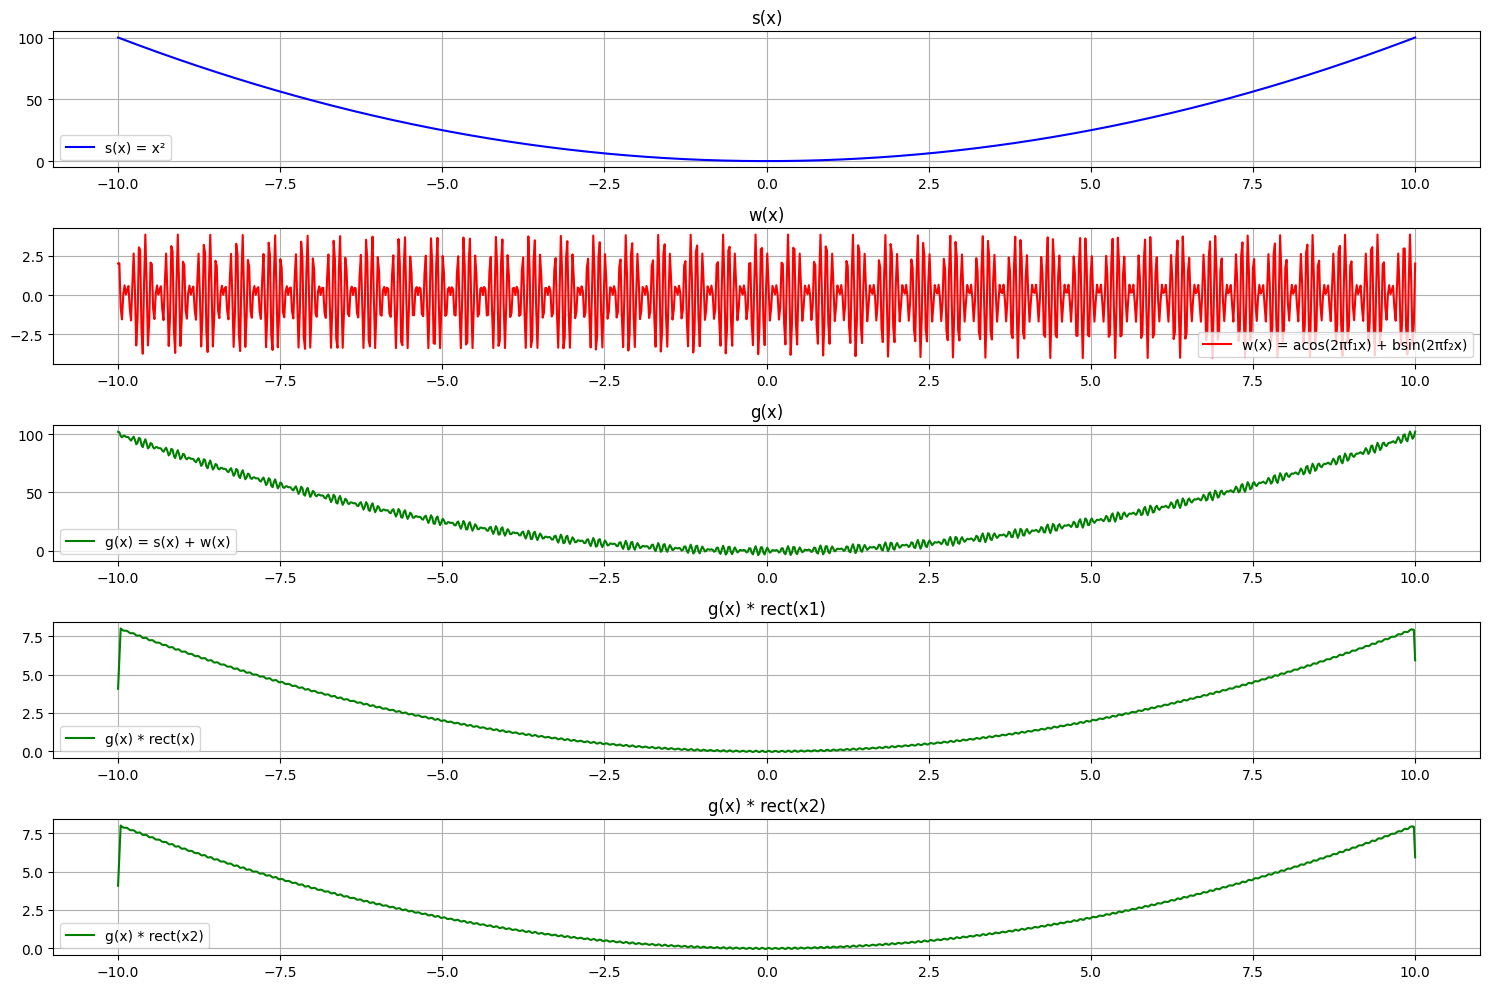

In [27]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 1000)


def s(x):
    return x**2

def w(x, a=1, b=1, f1=1, f2=1):
    return a * np.cos(2*np.pi*f1*x) + b * np.sin(2*np.pi*f2*x)
def rect(x, width=2):
    return np.where(np.abs(x) <= width/2, 1, 0)

def normalized_rect(x, width=2):
    return rect(x, width) / width

original_signal = s(t)
f1 =12
f2 = 10  
noise_signal = w(t, a=2, b=2, f1=f1, f2=f2)
normalized_rect_signal = normalized_rect(t, width=1/f2)

rect_signal = rect(t, width=1/f2)
rect_signal2 = rect(t, width=1/f1)

combined_signal = original_signal + noise_signal

conv_result = np.convolve(combined_signal, rect_signal, mode='same') * (t[1] - t[0])
conv_result2 = np.convolve(combined_signal, rect_signal2, mode='same') * (t[1] - t[0])

plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.plot(t, original_signal, 'b-', label='s(x) = x²')
plt.title('s(x)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(t, noise_signal, 'r-', label='w(x) = acos(2πf₁x) + bsin(2πf₂x)')
plt.title('w(x)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, combined_signal, 'g-', label='g(x) = s(x) + w(x)')
plt.title('g(x)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, conv_result, 'g-', label='g(x) * rect(x)')
plt.title('g(x) * rect(x1)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, conv_result2, 'g-', label='g(x) * rect(x2)')
plt.title('g(x) * rect(x2)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

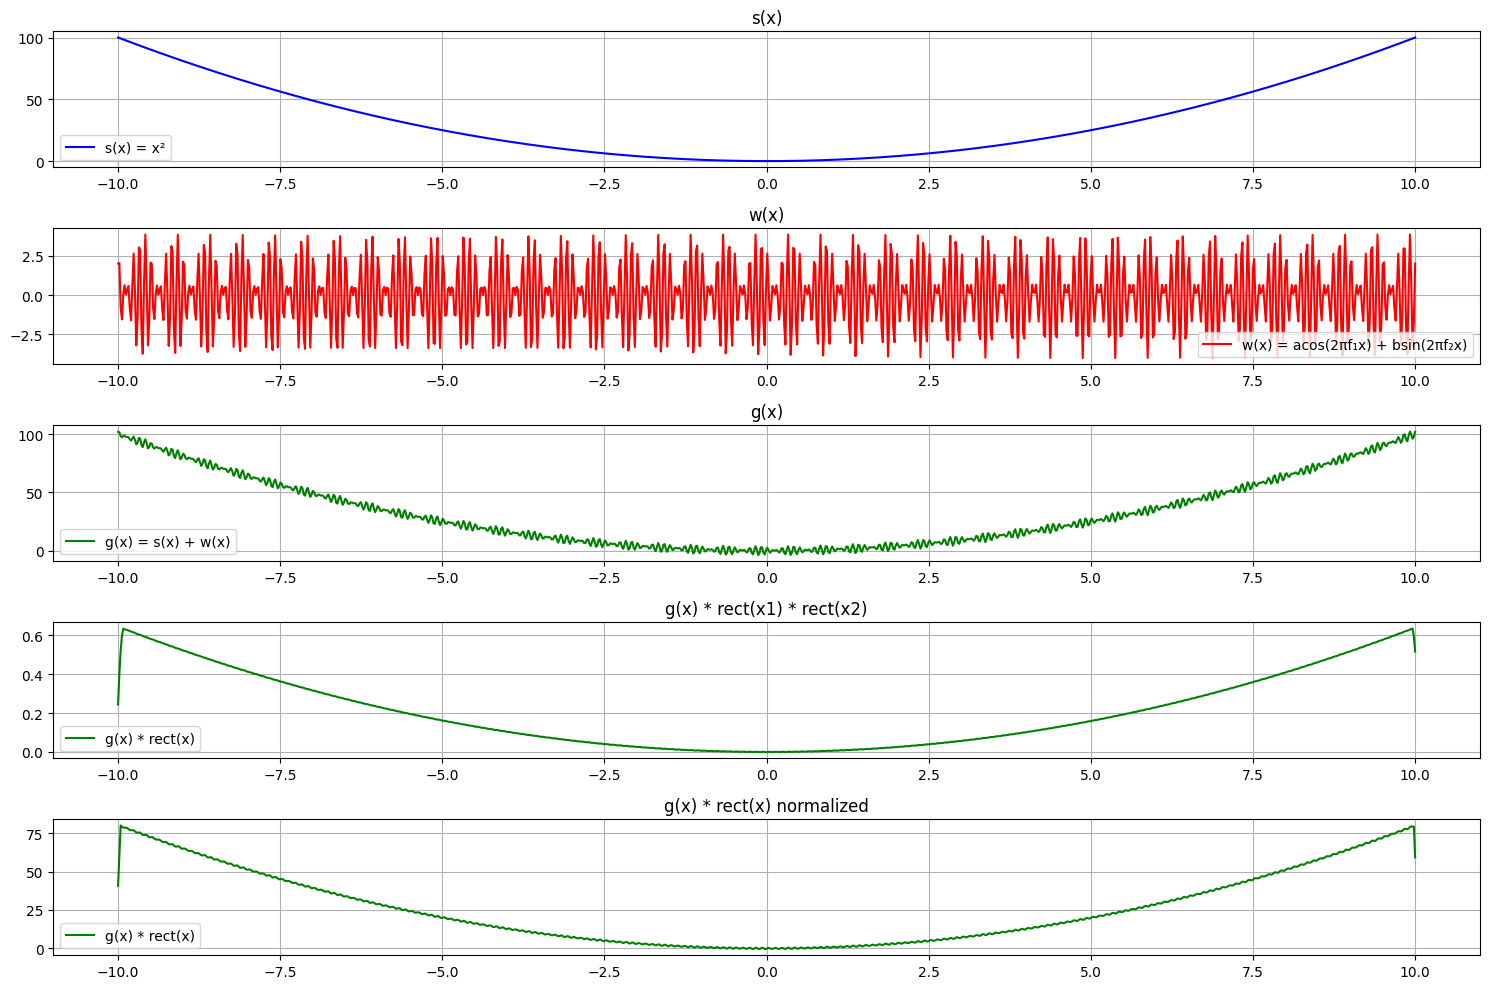

In [26]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 1000)


def s(x):
    return x**2

def w(x, a=1, b=1, f1=1, f2=1):
    return a * np.cos(2*np.pi*f1*x) + b * np.sin(2*np.pi*f2*x)
def rect(x, width=2):
    return np.where(np.abs(x) <= width/2, 1, 0)

def normalized_rect(x, width=2):
    return rect(x, width) / width

original_signal = s(t)
f1 = 12
f2 = 10  
noise_signal = w(t, a=2, b=2, f1=f1, f2=f2)
normalized_rect_signal = normalized_rect(t, width=1/f2)

rect_signal = rect(t, width=1/f2)
rect_signal2 = rect(t, width=1/f1)

perfect_filter = np.convolve(rect_signal, rect_signal2, mode='same') * (t[1] - t[0])

combined_signal = original_signal + noise_signal

conv_result = np.convolve(combined_signal, perfect_filter, mode='same') * (t[1] - t[0])

conv_result_normalized = np.convolve(combined_signal, normalized_rect_signal, mode='same') * (t[1] - t[0])
plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.plot(t, original_signal, 'b-', label='s(x) = x²')
plt.title('s(x)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(t, noise_signal, 'r-', label='w(x) = acos(2πf₁x) + bsin(2πf₂x)')
plt.title('w(x)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, combined_signal, 'g-', label='g(x) = s(x) + w(x)')
plt.title('g(x)')
plt.grid(True)
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, conv_result, 'g-', label='g(x) * rect(x)')
plt.title('g(x) * rect(x1) * rect(x2)')
plt.grid(True)
plt.legend()



plt.subplot(5, 1, 5)
plt.plot(t, conv_result_normalized, 'g-', label='g(x) * rect(x)')
plt.title('g(x) * rect(x) normalized')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

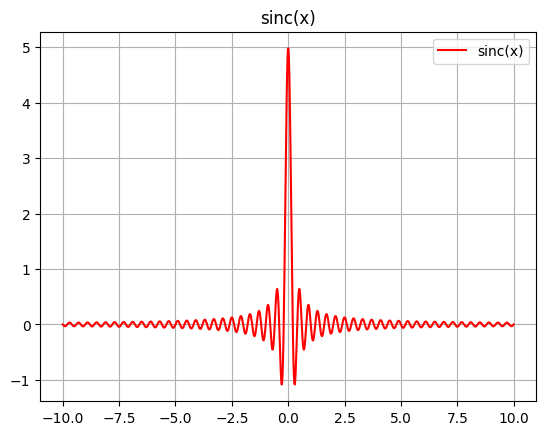

In [16]:
t = np.linspace(-10, 10, 1000)

def sinc(x, window):
    return window * np.sinc(window * x)

plt.subplot(1, 1, 1)
plt.plot(t, sinc(t, 5), 'r-', label='sinc(x)')
plt.title('sinc(x)')
plt.grid(True)
plt.legend()
